# 5. Bonus Certificate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

from scipy.optimize import fsolve
from gbm_d import gbm_d
from barrier_bs import barrier_bs
from yf import yf

### Example 5.1

We calculate the issue price of the product in the figure below (compare with example 3.2). The underlying has the values: $s=S_0=80.80$ CHF, $\sigma=14.74\%$ and $q=3.30\%$. The parameters of the option are: strike $X=84.84$ CHF, barrier $B=55.752$, time-to-maturity September 26, 2018 to September 27, 2021. The continuously compounded risk free is $r=-0.00329$. 

<img src="Image/BC_JB_1.jpg" alt="Drawing" style="width: 600px;"/>
<img src="Image/BC_JB_2.jpg" alt="Drawing" style="width: 600px;"/>

In [2]:
s = 80.80; q = 0.033; T = yf((26,9,2018),[(27,9,2021)]); 
Vbc = s*np.exp(-q*T)+barrier_bs(s,55.752,84.84,T[0],0.1474,-0.00329,q)[0]
Vbc[0]

79.63279969440778

## 5.2. Bonus certificates on several underlyings

In [3]:
# input parameters
s0 = [143.4,51.35]; q = [0.045,0.046]; r = np.log(1.0087)
sigma = np.diag([0.181,0.17]); rho = np.array([[1,0.416],[0,1]]); 
rho = rho+rho.T-np.eye(2); Sigma = sigma.dot(rho).dot(sigma)
B = [107.55,38.5125]; X = 1140; T = yf((3,5,2011),[(3,5,2013)])
mu = [r-x for x in q]
q = np.reshape(np.asarray(q),[2,1]); B = np.reshape(np.asarray(B),[2,1])

In [4]:
# generate two paths
S1, t = gbm_d(s0=s0,Sigma=Sigma,mu=mu,T=T,Tau=[],dt=T/(4*252))
S2, t = gbm_d(s0=s0,Sigma=Sigma,mu=mu,T=T,Tau=[],dt=T/(4*252))

C:\Users\nherm\AppData\Local\Temp/ipykernel_63916/2043737857.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array([B[0],B[0]]),np.array([0.8*B[1],np.maximum(S1max[1],S2max[1])]),'k:')
C:\Users\nherm\AppData\Local\Temp/ipykernel_63916/2043737857.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array([0.8*B[0],np.maximum(S1max[0],S2max[0])]),np.array([B[1],B[1]]),'k:')


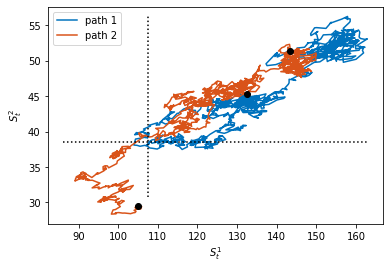

In [5]:
S1max = np.amax(S1,axis=0); S2max = np.amax(S2,axis=0);
plt.plot(S1[:,0],S1[:,1],color=(0,0.4470,0.7410)); 
plt.plot(S2[:,0],S2[:,1],color=(0.8500,0.3250,0.0980));
plt.plot(s0[0],s0[1],'ko'); # start point
plt.plot(S1[-1,0],S1[-1,1],'ko'); plt.plot(S2[-1,0],S2[-1,1],'ko'); # endpoints
plt.plot(np.array([B[0],B[0]]),np.array([0.8*B[1],np.maximum(S1max[1],S2max[1])]),'k:')
plt.plot(np.array([0.8*B[0],np.maximum(S1max[0],S2max[0])]),np.array([B[1],B[1]]),'k:')
plt.xlabel('$S_t^1$'); plt.ylabel('$S_t^2$'); plt.legend(('path 1','path 2'));

We calculate the issue price of the basket bonus certificate in the figure below. 

<img src="Image/MBC_LEU.jpg" alt="Drawing" style="width: 600px;"/>

The underlyings have the values: $s_1=S_0^1=143.4$, $s_2=S^2_0=51.35$, $\sigma_1=18.1\%$, $\sigma_2=17.0\%$, $\rho=0.416$, discrete dividends $D_1=6.60$ and $D_2=2.34$, resulting in the continuous dividend yields $q_1=\ln(1+D_1/S^1_0)=4.50\%$ and $q_2=\ln(1+D_2/S^2_0)=4.46\%$, respectively. The continuously compounded risk free is $r=\ln(1+0.0087)$. The parameters of the product are: bonus level $X=1140$, barriers $B_1=107.55$ and $B_2=38.5125$, time-to-maturity May 3, 2011 to May 3, 2013.

In [6]:
# input parameters (Monte Carlo simulation)
n = 10**4; dt = 1/(8*252); v = np.zeros(n)

In [7]:
omega = 1000/(2*np.reshape(np.asarray(s0),[2,1]))
# Monte Carlo simulation
for j in range(0,n):
    D = gbm_d(s0,mu,Sigma,[],T,dt) 
    S = D[0][1:] # simulated stock prices, excluding s0
    # the minimium stock prices
    Smin = np.amin(S,axis=0); Smin = Smin.reshape(2,1)
    ST = S[-1,:]; ST = ST.reshape(2,1)
    BT = np.sum(omega*ST) # final basket value
    
    if np.any(Smin-B<=0): # barrier hit?
        v[j] = BT 
    else:
        v[j] = BT+np.maximum(X-BT,0) 
    
V = np.exp(-r*T)*np.mean(v)

In [ ]:
V[0]